In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

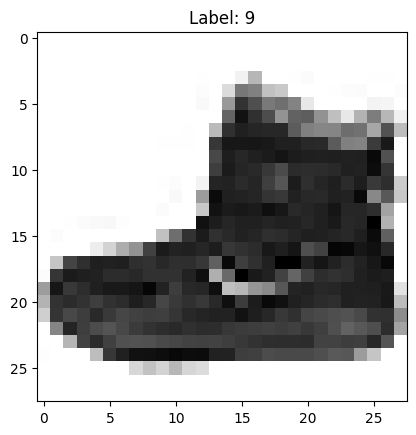

In [ ]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7858 - loss: 0.6202
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8634 - loss: 0.3814
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8779 - loss: 0.3351
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8830 - loss: 0.3138
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8929 - loss: 0.2945


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.8780 - loss: 0.3385
Test accuracy: 0.878000020980835


In [ ]:
predictions = model.predict(test_images)
print(f"Predicted label for first test image: {np.argmax(predictions[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted label for first test image: 9


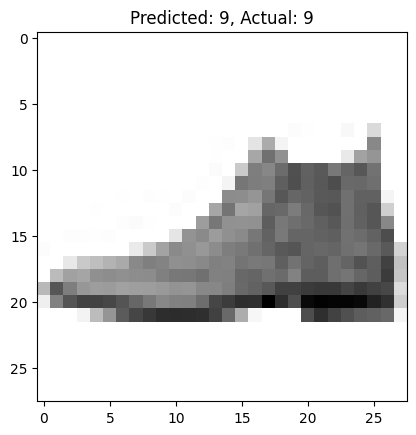

In [ ]:
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {test_labels[0]}")
plt.show()